In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns


In [3]:
image_folder = "C:\\Users\\kevin\\OneDrive\\문서\\intern\\targets393\\resized"

metadata_path = "C:\\Users\\kevin\\OneDrive\\문서\\intern\\dataset-master\\csv_files\\targets393_metadata.csv"
metadata = pd.read_csv(metadata_path, encoding='ISO-8859-1')

image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.png')]

In [5]:
metadata.head()

,filename,source,category,vistype,title,title location,attr: data-ink ratio,attr: # distinct colors,attr: black&white,attr: visual density,attr: human recognizable object,attr: human depiction,mem: at-a-glance HR (%),mem: at-a-glance FAR (%),mem: prolonged HR (%),data redundancy,message redundancy,illegible
0,economist_daily_chart_103.png,Economist Daily,N,Bars,Food* surpluses and deficits,Top-left,2,3,n,1,n,n,41.76,10.89,81.82,0,0,0
1,economist_daily_chart_106.png,Economist Daily,N,Bars,Cost of sending a standard-sized letter domest...,Top-left,1,2,n,1,n,n,39.08,29.47,80.00,0,0,0
2,economist_daily_chart_110.png,Economist Daily,N,Maps,Ecological footprint*,Top-left,1,1,n,1,y,n,77.53,26.53,100.00,0,0,0
3,economist_daily_chart_116.png,Economist Daily,N,Area,Total stock of electric and plug-in hybrid veh...,Top-left,2,2,n,2,n,n,46.51,10.00,76.47,0,0,0
4,economist_daily_chart_124.png,Economist Daily,N,Maps,Mobile-money users in Africa,Key (bottom-left),1,1,n,1,y,n,73.26,18.81,81.25,0,0,0


In [4]:
# Filter metadata to only include entries for which there are corresponding images
image_names = [os.path.basename(f) for f in image_files]
matched_metadata = metadata[metadata['filename'].isin(image_names)]

In [5]:
from scipy.stats import norm
import pandas as pd

# d' function 
def d_prime(hit_rate, false_alarm_rate):
    hit_rate = max(0.01, min(0.99, hit_rate))
    false_alarm_rate = max(0.01, min(0.99, false_alarm_rate))
    d_value = norm.ppf(hit_rate) - norm.ppf(false_alarm_rate)
    return d_value

# Modified to ensure all columns are retained
def compute_dprime_for_dataset(df, hit_rate_col, far_col):
    df['d_prime'] = df.apply(lambda row: d_prime(row[hit_rate_col] / 100, row[far_col] / 100), axis=1)
    return df

In [6]:
df_with_dprime = compute_dprime_for_dataset(matched_metadata.copy(), 'mem: at-a-glance HR (%)', 'mem: at-a-glance FAR (%)')


In [7]:
df_with_dprime

,filename,source,category,vistype,title,title location,attr: data-ink ratio,attr: # distinct colors,attr: black&white,attr: visual density,attr: human recognizable object,attr: human depiction,mem: at-a-glance HR (%),mem: at-a-glance FAR (%),mem: prolonged HR (%),data redundancy,message redundancy,illegible,d_prime
0,economist_daily_chart_103.png,Economist Daily,N,Bars,Food* surpluses and deficits,Top-left,2,3,n,1,n,n,41.76,10.89,81.82,0,0,0,1.024362
1,economist_daily_chart_106.png,Economist Daily,N,Bars,Cost of sending a standard-sized letter domest...,Top-left,1,2,n,1,n,n,39.08,29.47,80.00,0,0,0,0.262471
2,economist_daily_chart_110.png,Economist Daily,N,Maps,Ecological footprint*,Top-left,1,1,n,1,y,n,77.53,26.53,100.00,0,0,0,1.383506
3,economist_daily_chart_116.png,Economist Daily,N,Area,Total stock of electric and plug-in hybrid veh...,Top-left,2,2,n,2,n,n,46.51,10.00,76.47,0,0,0,1.193958
4,economist_daily_chart_124.png,Economist Daily,N,Maps,Mobile-money users in Africa,Key (bottom-left),1,1,n,1,y,n,73.26,18.81,81.25,0,0,0,1.505615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,wsj593.png,Wall Street Journal,N,Bars,Off Season,Top-left,1,2,n,1,n,n,55.17,3.26,87.50,1,1,0,1.973842
389,wsj612.png,Wall Street Journal,N,Lines,Funding Gap,Top-left,2,2,n,2,n,n,67.78,41.41,78.57,1,1,0,0.678566
390,wsj79.png,Wall Street Journal,N,Table,Poll Positions,Top-left,2,2,n,1,y,n,56.67,4.08,75.00,0,1,0,1.909456
391,wsj9.png,Wall Street Journal,N,Bars,Brought to Light,Top-left,1,2,n,1,n,n,56.10,12.77,58.82,0,1,0,1.290836


In [8]:
import pandas as pd

# Sample data (replace this with your actual dataframe loading code)


# Find the row with the least d_prime value
min_dprime_row = df_with_dprime.loc[df_with_dprime['d_prime'].idxmin()]

# Find the row with the highest d_prime value
max_dprime_row = df_with_dprime.loc[df_with_dprime['d_prime'].idxmax()]

# Print the results
print("Row with the least d_prime value:")
print(min_dprime_row)
print("\nRow with the highest d_prime value:")
print(max_dprime_row)


Row with the least d_prime value:
filename                                                                whoQ48_5.png
source                                                     World Health Organization
category                                                                           G
vistype                                                                        Lines
title                              G-Countries projected to achieve >75% decrease...
title location                                                                   Top
attr: data-ink ratio                                                               1
attr: # distinct colors                                                            1
attr: black&white                                                                  n
attr: visual density                                                               1
attr: human recognizable object                                                    n
attr: human depiction          

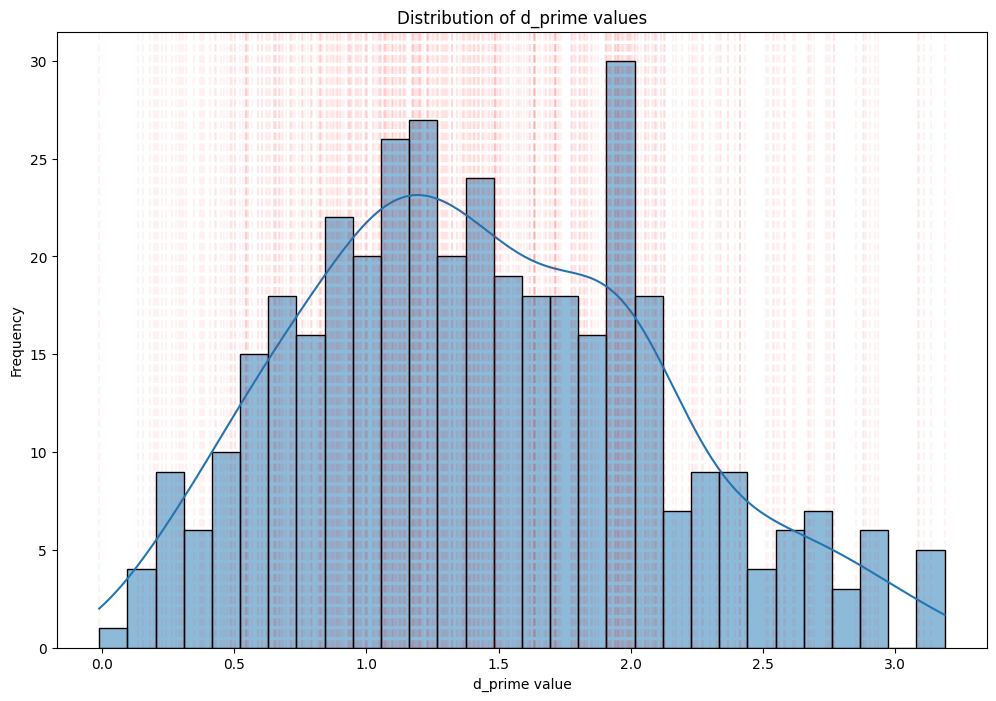

In [9]:
# Plotting the distribution of d_prime values

# Values for the x-axis
x = np.linspace(-0.01, 3.19, 1000)

# Calculating the percentile of each d_prime value in the normal distribution
percentiles = df_with_dprime['d_prime'].apply(lambda val: norm.cdf(val) * 100)

# Plotting
plt.figure(figsize=(12, 8))
sns.histplot(df_with_dprime['d_prime'], kde=True, bins=30)
for percentile in percentiles:
    plt.axvline(x=norm.ppf(percentile / 100), color='red', linestyle='--', alpha=0.05)

plt.title('Distribution of d_prime values')
plt.xlabel('d_prime value')
plt.ylabel('Frequency')
plt.show()

In [10]:
print(df_with_dprime.columns)

Index(['filename', 'source', 'category', 'vistype', 'title', 'title location',
       'attr: data-ink ratio', 'attr: # distinct colors', 'attr: black&white',
       'attr: visual density', 'attr: human recognizable object',
       'attr: human depiction', 'mem: at-a-glance HR (%)',
       'mem: at-a-glance FAR (%)', 'mem: prolonged HR (%)', 'data redundancy',
       'message redundancy', 'illegible', 'd_prime'],
      dtype='object')


In [11]:
# One-hot encoding the categorical columns
encoded_data = pd.get_dummies(df_with_dprime, columns=['source', 'category', 'vistype', 'title location', 'attr: black&white',
                                            'attr: human recognizable object', 'attr: human depiction'])

In [12]:
encoded_data
print(encoded_data.columns)

Index(['filename', 'title', 'attr: data-ink ratio', 'attr: # distinct colors',
       'attr: visual density', 'mem: at-a-glance HR (%)',
       'mem: at-a-glance FAR (%)', 'mem: prolonged HR (%)', 'data redundancy',
       'message redundancy', 'illegible', 'd_prime', 'source_Economist Daily',
       'source_National Post', 'source_Nature',
       'source_US Department of the Treasury', 'source_Visual.ly',
       'source_Wall Street Journal', 'source_World Health Organization',
       'category_G', 'category_I', 'category_N', 'category_S', 'vistype_Area',
       'vistype_Bars', 'vistype_Circles', 'vistype_Diagrams',
       'vistype_Distribution', 'vistype_Grid / Matrix', 'vistype_Lines',
       'vistype_Maps', 'vistype_Points', 'vistype_Table',
       'vistype_Trees and Networks', 'title location_(off)Center-(off)left',
       'title location_(title1) top-center; (title2) bottom-center',
       'title location_Bottom', 'title location_Bottom(higher)-left',
       'title location_Bottom

C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\2723812121.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_dprime_all = encoded_data.corr()['d_prime'].drop('d_prime').sort_values()


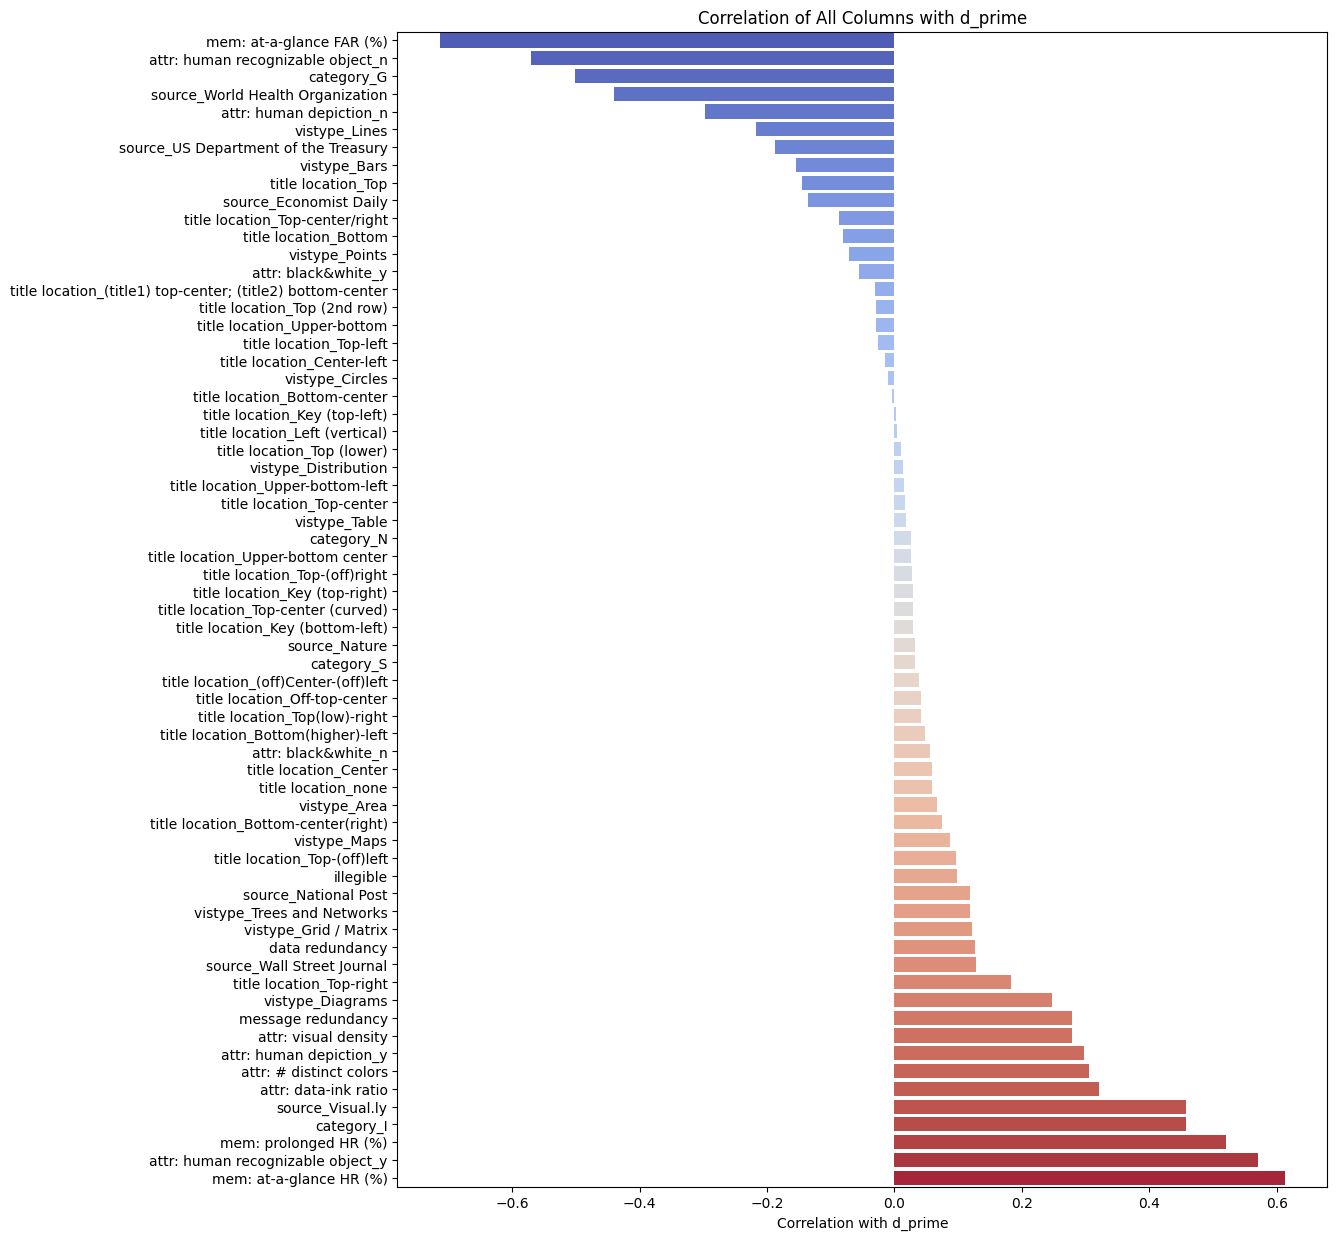

In [13]:

# Calculating the correlation of each column with 'd_prime'
correlation_with_dprime_all = encoded_data.corr()['d_prime'].drop('d_prime').sort_values()

# Plotting the correlations for all columns
plt.figure(figsize=(12, 15))
sns.barplot(x=correlation_with_dprime_all.values, y=correlation_with_dprime_all.index, palette='coolwarm')
plt.xlabel('Correlation with d_prime')
plt.title('Correlation of All Columns with d_prime')
plt.show()


In [14]:
# 1. Drop the columns used for calculating d_prime
filtered_data = encoded_data.drop(columns=['mem: at-a-glance HR (%)', 'mem: at-a-glance FAR (%)', 'mem: prolonged HR (%)', 'category_G', 'category_I', 'message redundancy', 'title location_Top-right', 'vistype_Diagrams',  'vistype_Trees and Networks', 'vistype_Grid / Matrix', 'data redundancy', 'title location_Top'])
# 2. Recalculate the correlation of each column with 'd_prime'
correlations = filtered_data.corr()['d_prime'].drop('d_prime').sort_values()
# 3. Filter out columns with weak correlations
significant_correlations = correlations[correlations.abs() > 0.1]
# 4. Extract the column names with significant correlations and exclude all 'source' columns
filtered_significant_columns = [col for col in significant_correlations.index if not col.startswith('source_')]
# 5. Create a new dataframe with only the significant columns
filtered_dataframe = filtered_data[filtered_significant_columns]
filtered_dataframe

C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\824367096.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = filtered_data.corr()['d_prime'].drop('d_prime').sort_values()


,attr: human recognizable object_n,attr: human depiction_n,vistype_Lines,vistype_Bars,attr: visual density,attr: human depiction_y,attr: # distinct colors,attr: data-ink ratio,attr: human recognizable object_y
0,1,1,0,1,1,0,3,2,0
1,1,1,0,1,1,0,2,1,0
2,0,1,0,0,1,0,1,1,1
3,1,1,0,0,2,0,2,2,0
4,0,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...
388,1,1,0,1,1,0,2,1,0
389,1,1,1,0,2,0,2,2,0
390,0,1,0,0,1,0,2,2,1
391,1,1,0,1,1,0,2,1,0


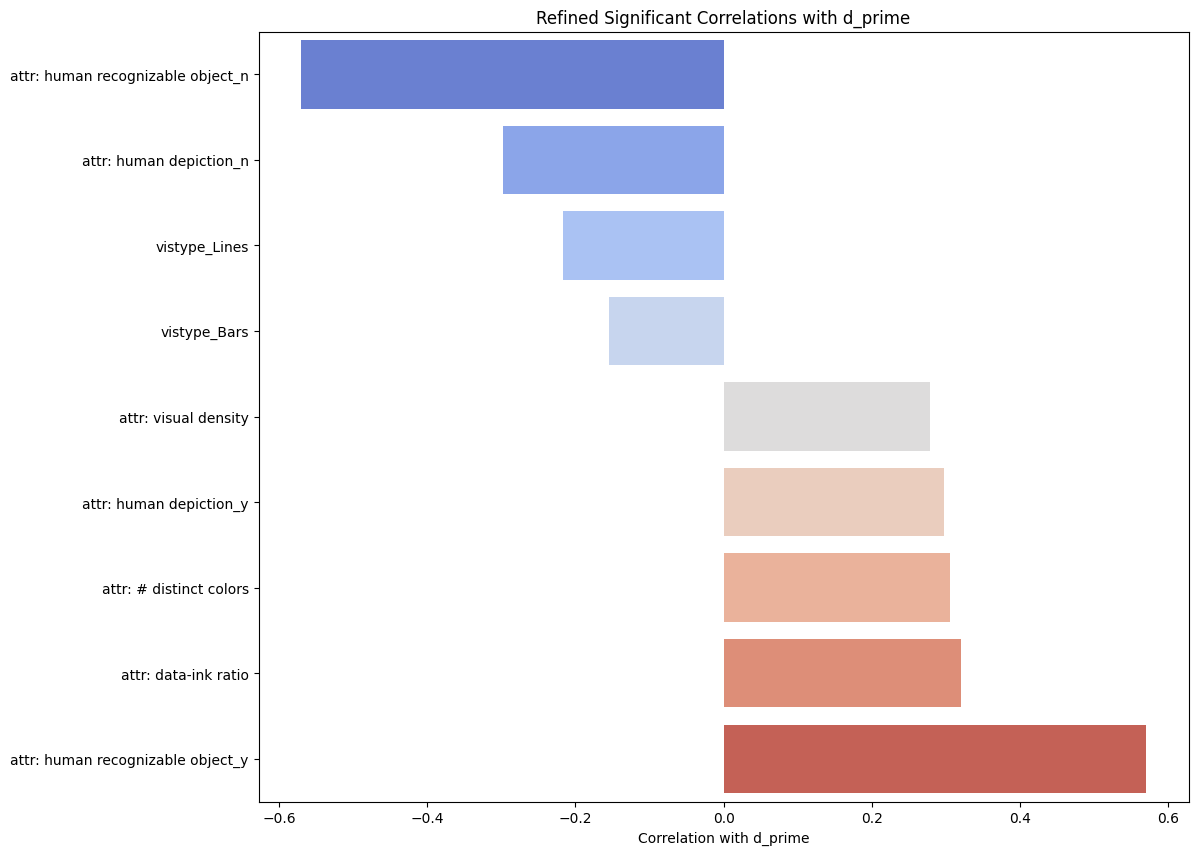

In [15]:
# Plotting the significant correlations for the refined list of columns
plt.figure(figsize=(12, 10))
sns.barplot(x=significant_correlations[filtered_significant_columns].values, 
            y=filtered_significant_columns, 
            palette='coolwarm')
plt.xlabel('Correlation with d_prime')
plt.title('Refined Significant Correlations with d_prime')
plt.show()



In [16]:
filtered_dataframe

,attr: human recognizable object_n,attr: human depiction_n,vistype_Lines,vistype_Bars,attr: visual density,attr: human depiction_y,attr: # distinct colors,attr: data-ink ratio,attr: human recognizable object_y
0,1,1,0,1,1,0,3,2,0
1,1,1,0,1,1,0,2,1,0
2,0,1,0,0,1,0,1,1,1
3,1,1,0,0,2,0,2,2,0
4,0,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...
388,1,1,0,1,1,0,2,1,0
389,1,1,1,0,2,0,2,2,0
390,0,1,0,0,1,0,2,2,1
391,1,1,0,1,1,0,2,1,0


In [17]:
print(filtered_dataframe.columns)

Index(['attr: human recognizable object_n', 'attr: human depiction_n',
       'vistype_Lines', 'vistype_Bars', 'attr: visual density',
       'attr: human depiction_y', 'attr: # distinct colors',
       'attr: data-ink ratio', 'attr: human recognizable object_y'],
      dtype='object')


In [18]:
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import pandas as pd

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(500, 500))
    return image.img_to_array(img) / 255.0

image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.png')]
image_data = np.array([load_and_preprocess_image(img_path) for img_path in image_files])


image_filenames = [os.path.basename(f) for f in image_files]


ordered_filtered_dataframe = filtered_dataframe.set_index(df_with_dprime['filename']).loc[image_filenames].reset_index(drop=True)

print(ordered_filtered_dataframe.shape, image_data.shape)


(393, 9) (393, 500, 500, 3)


In [19]:
from sklearn.model_selection import train_test_split


y_values = df_with_dprime.set_index('filename').loc[image_filenames]['d_prime'].values


X_meta_train, X_meta_test, X_img_train, X_img_test, y_train, y_test = train_test_split(
    ordered_filtered_dataframe.values, image_data, y_values, test_size=0.2, random_state=42)

print("Training metadata shape:", X_meta_train.shape)
print("Testing metadata shape:", X_meta_test.shape)
print("Training image data shape:", X_img_train.shape)
print("Testing image data shape:", X_img_test.shape)
print("Training d_prime values shape:", y_train.shape)
print("Testing d_prime values shape:", y_test.shape)


Training metadata shape: (314, 9)
Testing metadata shape: (79, 9)
Training image data shape: (314, 500, 500, 3)
Testing image data shape: (79, 500, 500, 3)
Training d_prime values shape: (314,)
Testing d_prime values shape: (79,)


In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, concatenate, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model


input_image = Input(shape=(500, 500, 3), name="input_image")
x = Conv2D(64, (3, 3), activation='relu')(input_image)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
flatten_layer = Flatten()(x)


input_meta = Input(shape=(9,), name="input_meta")
dense1 = Dense(32, activation='relu')(input_meta)
batch_norm1 = BatchNormalization()(dense1)
dropout1 = Dropout(0.5)(batch_norm1)
dense2 = Dense(16, activation='relu')(dropout1)
batch_norm2 = BatchNormalization()(dense2)
dropout2 = Dropout(0.5)(batch_norm2)


merged = concatenate([flatten_layer, dropout2])
merged_dense1 = Dense(16, activation='relu')(merged)
merged_batch_norm1 = BatchNormalization()(merged_dense1)
merged_dropout1 = Dropout(0.5)(merged_batch_norm1)
merged_dense2 = Dense(16, activation='relu')(merged_dropout1)
merged_batch_norm2 = BatchNormalization()(merged_dense2)
merged_dropout2 = Dropout(0.5)(merged_batch_norm2)


output_layer = Dense(1, activation='sigmoid')(merged_dropout2)

# Define the range for d_prime values
min_dprime = -0.011365
max_dprime = 3.18765
range_dprime = max_dprime - min_dprime

# Scale and shift the output to match the range [-0.011365, 3.18765]
output = tf.keras.layers.Lambda(lambda x: x * range_dprime + min_dprime)(output_layer)

# Compile the Model
model = Model(inputs=[input_image, input_meta], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 500, 500, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 498, 498, 64)         1792      ['input_image[0][0]']         
                                                                                                  
 input_meta (InputLayer)     [(None, 9)]                  0         []                            
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 249, 249, 64)         0         ['conv2d[0][0]']              
 D)                                                                                           

In [27]:
history = model.fit([X_img_train, X_meta_train], y_train, 
                    validation_data=([X_img_test, X_meta_test], y_test),
                    epochs=100, batch_size=32)


Epoch 1/100
10/10 [==============================] - 34s 3s/step - loss: 0.3727 - mae: 0.4698 - val_loss: 0.8619 - val_mae: 0.7850
Epoch 2/100
10/10 [==============================] - 33s 3s/step - loss: 0.3550 - mae: 0.4596 - val_loss: 0.5952 - val_mae: 0.6450
Epoch 3/100
10/10 [==============================] - 33s 3s/step - loss: 0.3898 - mae: 0.4916 - val_loss: 1.0569 - val_mae: 0.8915
Epoch 4/100
10/10 [==============================] - 33s 3s/step - loss: 0.3723 - mae: 0.4614 - val_loss: 0.7554 - val_mae: 0.7295
Epoch 5/100
10/10 [==============================] - 33s 3s/step - loss: 0.3495 - mae: 0.4537 - val_loss: 0.6587 - val_mae: 0.6815
Epoch 6/100
10/10 [==============================] - 33s 3s/step - loss: 0.3409 - mae: 0.4598 - val_loss: 0.7169 - val_mae: 0.7104
Epoch 7/100
10/10 [==============================] - 33s 3s/step - loss: 0.3855 - mae: 0.4825 - val_loss: 1.4580 - val_mae: 1.0730
Epoch 8/100
10/10 [==============================] - 33s 3s/step - loss: 0.3463 - m

In [28]:
loss, mae = model.evaluate([X_img_test, X_meta_test], y_test)
print(f"Mean Absolute Error on Test Data: {mae:.4f}")

3/3 [==============================] - 2s 480ms/step - loss: 0.3605 - mae: 0.5058
Mean Absolute Error on Test Data: 0.5058


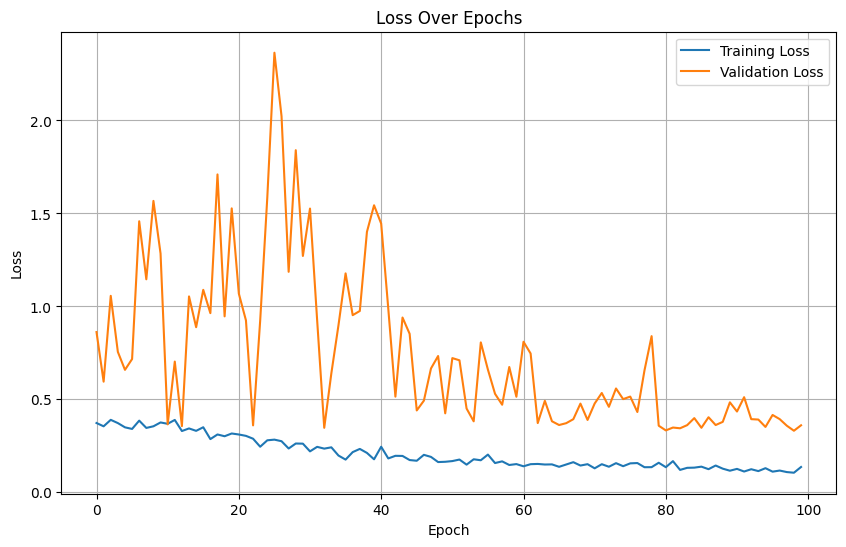

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 268ms/step


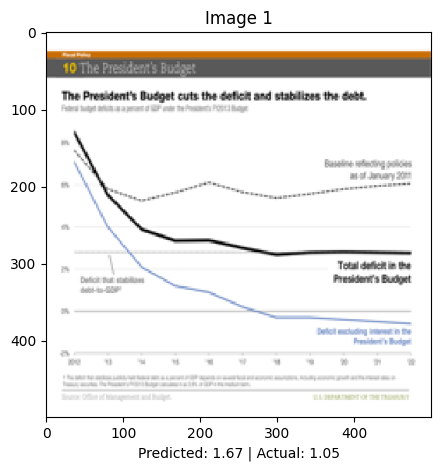

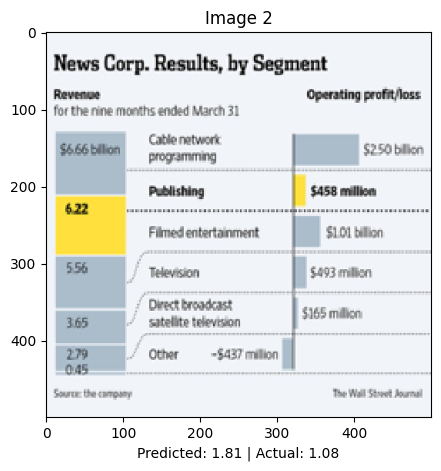

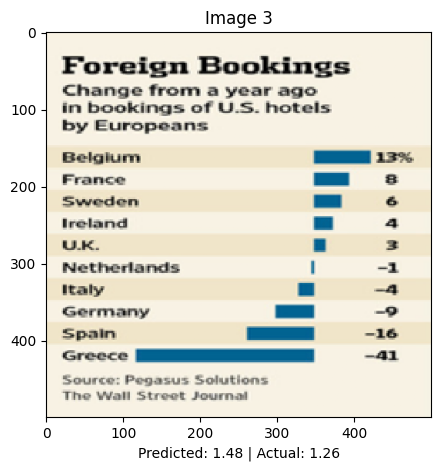

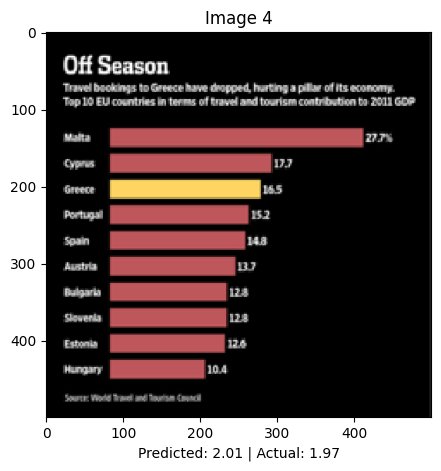

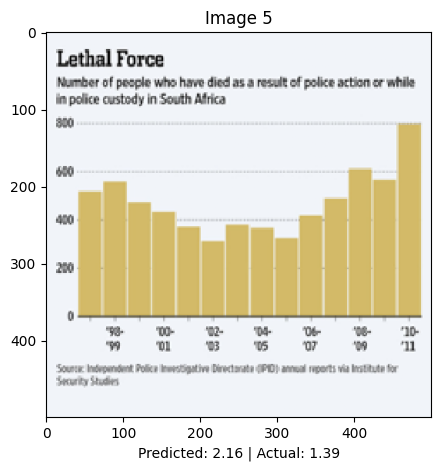

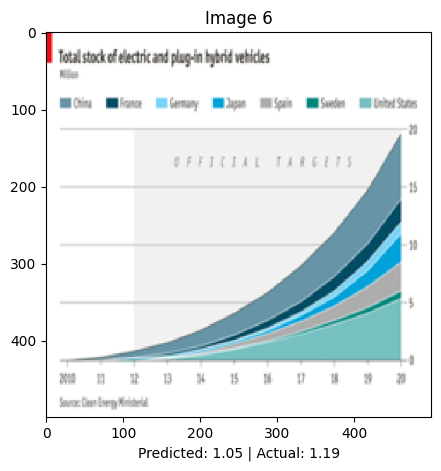

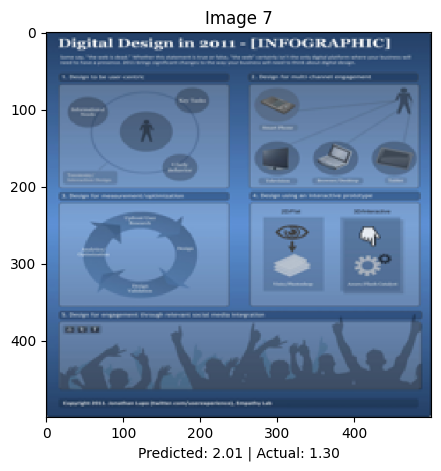

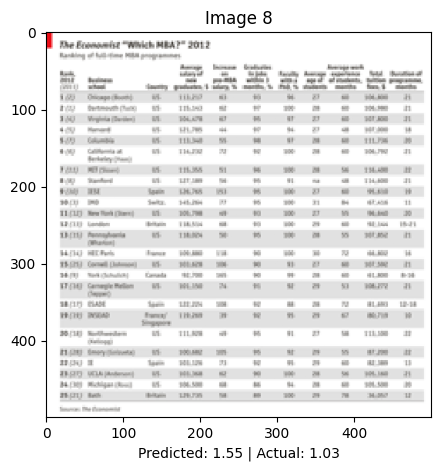

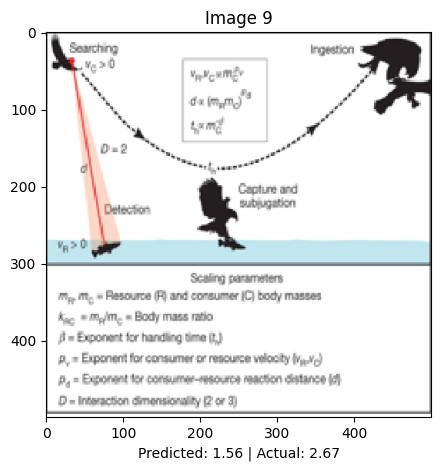

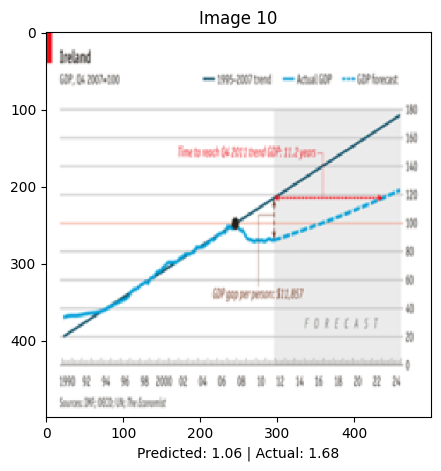

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the following data loaded:
# X_img_test: Test images
# X_meta_test: Test metadata
# y_test: Actual values

# Randomly select 10 indices from the test dataset
random_indices = np.random.choice(X_img_test.shape[0], 10, replace=False)

# Get the random samples and their corresponding metadata and actual values
random_images = X_img_test[random_indices]
random_meta = X_meta_test[random_indices]
random_actual_values = y_test[random_indices]

# Predict using the model
predictions = model.predict([random_images, random_meta])

# Display each image, its predicted value, and its actual value
for i, (image, predicted, actual) in enumerate(zip(random_images, predictions, random_actual_values)):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.xlabel(f"Predicted: {predicted[0]:.2f} | Actual: {actual:.2f}")
    plt.show()
